In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")


In [3]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [5]:
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


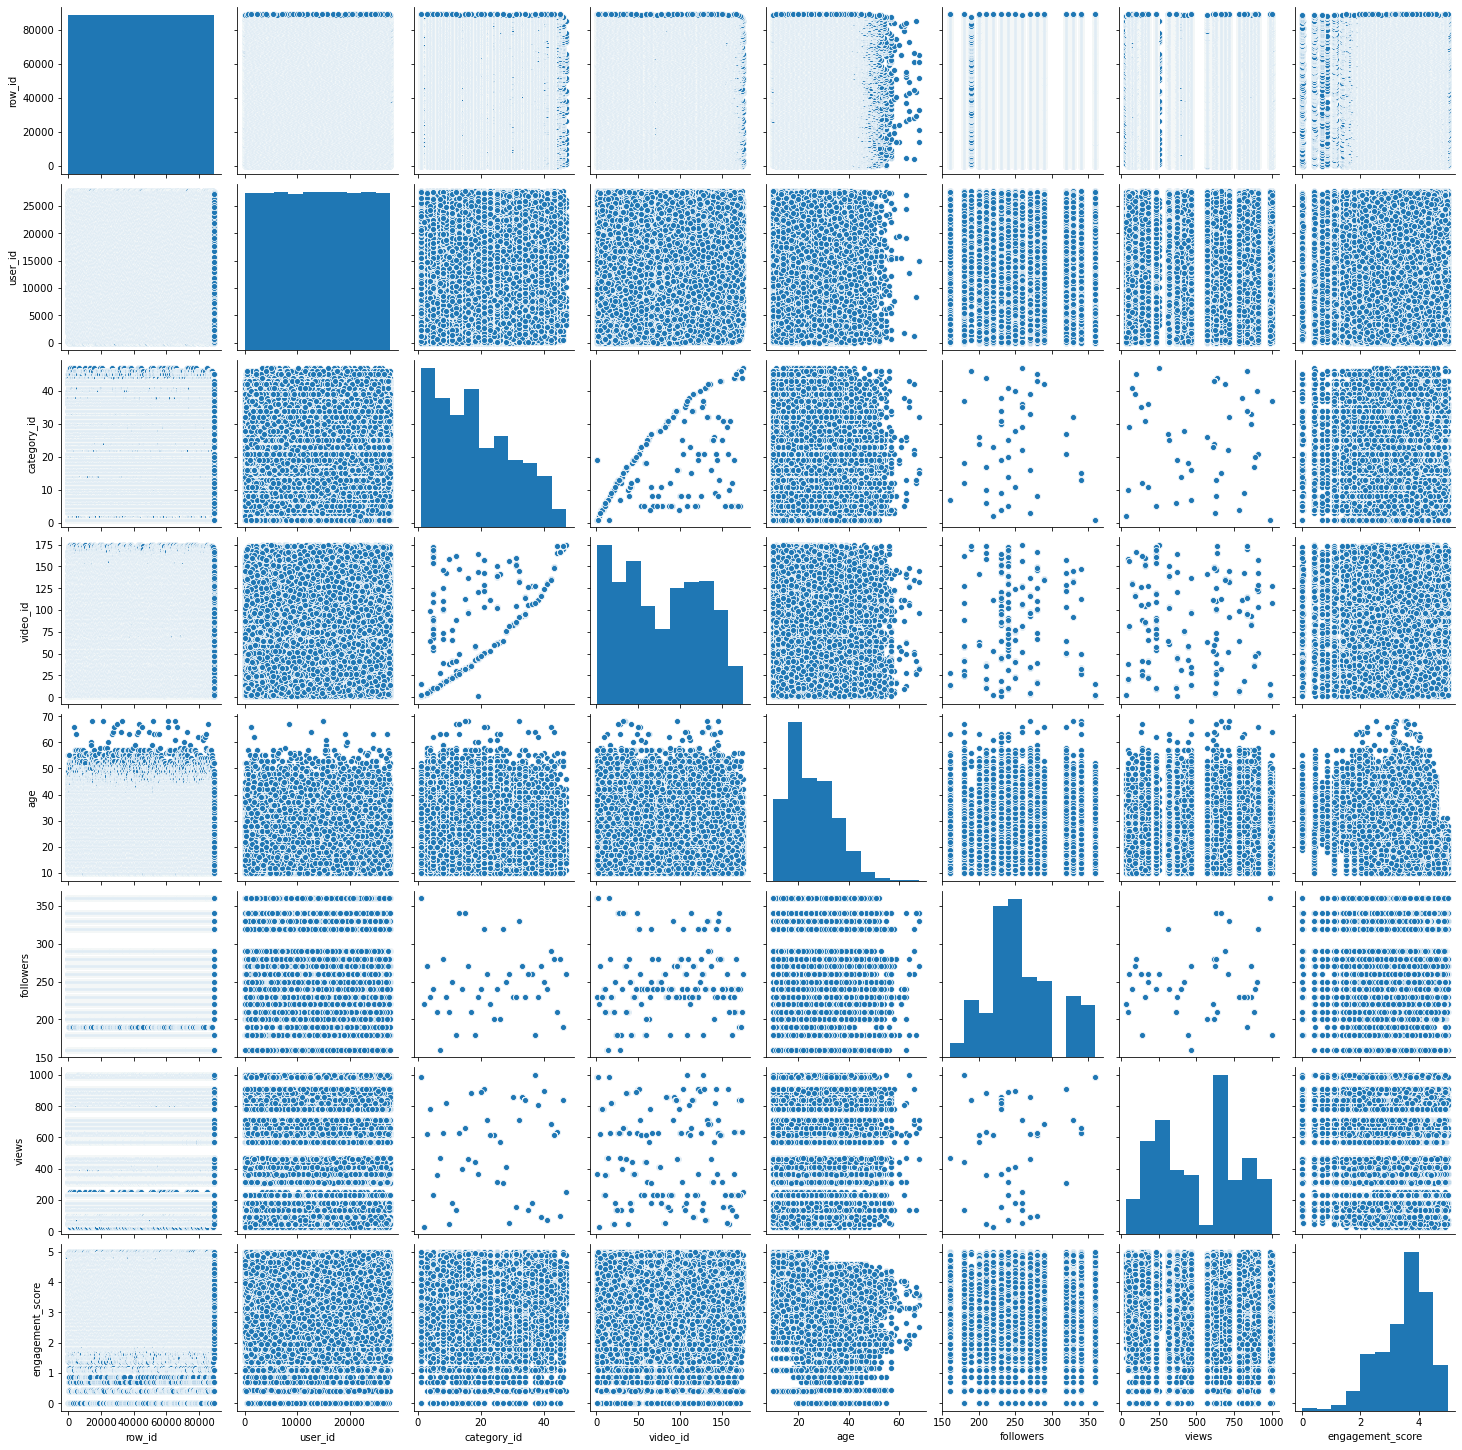

In [8]:
sns.pairplot(train)

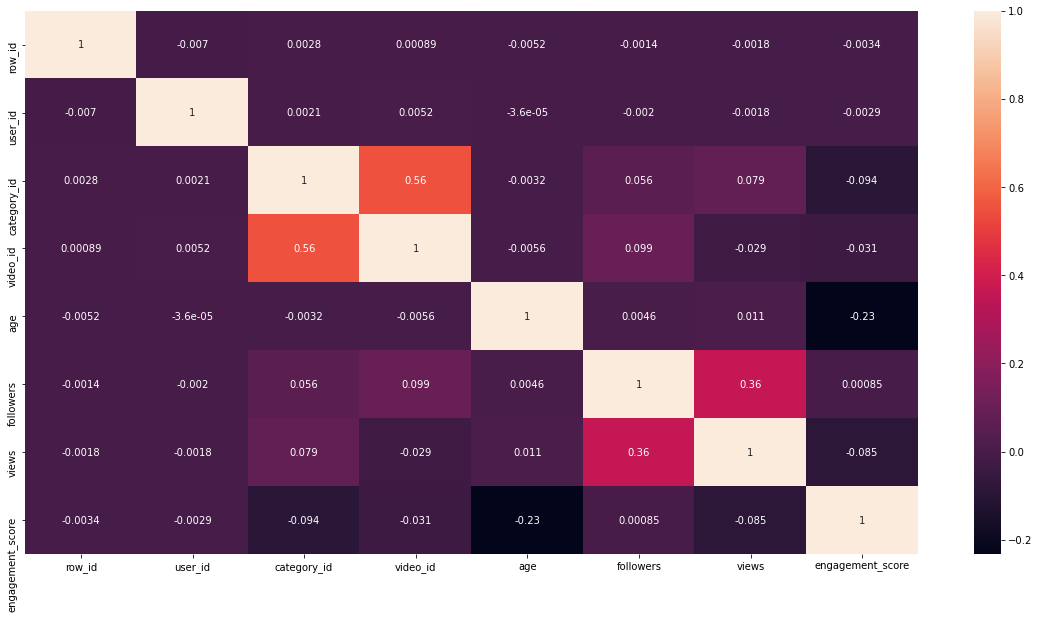

In [9]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(train.corr(), annot=True)


In [10]:
ID = test['row_id']

In [11]:
train = train.drop(['row_id', 'user_id'], axis=1)
test = test.drop(['row_id', 'user_id'], axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train["gender"] = le.fit_transform(train["gender"])
train["profession"] = le.fit_transform(train["gender"])

test["gender"] = le.fit_transform(test["gender"])
test["profession"] = le.fit_transform(test["gender"])

In [13]:
train.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,1,1,180,1000,4.33
1,32,132,14,0,0,330,714,1.79
2,12,24,19,1,1,180,138,4.35
3,23,112,19,1,1,220,613,3.77
4,23,112,27,1,1,220,613,3.13


In [14]:
test.head()

,category_id,video_id,age,gender,profession,followers,views
0,12,42,14,1,1,180,138
1,34,115,14,1,1,230,840
2,8,110,44,0,0,280,628
3,16,137,18,1,1,270,462
4,34,96,47,0,0,230,840


In [15]:
y = train['engagement_score']
X = train.drop(['engagement_score'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, shuffle=False)

In [17]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.linear_model import Ridge

model2 = Ridge()
model2.fit(X_train, y_train)

Ridge()

In [19]:
from sklearn.linear_model import Lasso

model3 = Lasso()
model3.fit(X_train, y_train)

Lasso()

In [20]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(n_estimators=100)
model4.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
from sklearn.ensemble import ExtraTreesRegressor

model5 = ExtraTreesRegressor()
model5.fit(X_train, y_train)

ExtraTreesRegressor()

In [22]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

model6 = GradientBoostingRegressor()
model6.fit(X_train, y_train)

GradientBoostingRegressor()

In [24]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model7 = HistGradientBoostingRegressor()
model7.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [25]:
from sklearn.ensemble import VotingRegressor

model = VotingRegressor(estimators = [("m1", model1), ("m2", model2), ("m3", model3), ("m4", model4),("m5", model5), ("m6", model6),("m7",  model7)])
model.fit(X_train, y_train)

VotingRegressor(estimators=[('m1', LinearRegression()), ('m2', Ridge()),
                            ('m3', Lasso()), ('m4', RandomForestRegressor()),
                            ('m5', ExtraTreesRegressor()),
                            ('m6', GradientBoostingRegressor()),
                            ('m7', HistGradientBoostingRegressor())])

In [26]:
y_pred = model.predict(X_valid)

In [27]:
from sklearn.metrics import r2_score

r2_score(y_valid, y_pred)

0.2877879332368699

In [28]:
models = []
models.append(('Linear', model1))
models.append(('ExtraTrees', model5))
models.append(('Forest', model4))
models.append(('Gradient', model6))
models.append(('ADA', model))
models.append(('Ridge', model2))
models.append(('Lasso', model3))
models.append(('Hist Gradient', model7))

In [29]:
model_comp = pd.DataFrame(columns=['Model', 'R2'])


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    model_comp = model_comp.append([{'Model': name, 'R2': r2}])

model_comp

,Model,R2
0,Linear,0.226899
0,ExtraTrees,0.167499
0,Forest,0.204985
0,Gradient,0.303624
0,ADA,0.287618
0,Ridge,0.226899
0,Lasso,0.045467
0,Hist Gradient,0.322594


In [30]:
predictions = model7.predict(test)

In [31]:
predictions

array([4.08764594, 3.71782349, 2.88323244, ..., 3.71019018, 3.70031874,
       3.57775178])